# Lineare Regression

**Lineare Regression in der Vektorschreibweise:**  
$\hat y = h_{\theta}(\textbf{x})=\theta^{T}*\textbf{x}$

* $\theta$: Parametervektor mit Bias-Term (Achsenabschnitt) und der $\theta_{0}$ Gewichte aller Merkmale
* $\theta^{T}$: Zeilenvektor (transponiert) mit allen Merkmalsgewichten
* $\textbf{x}$: Zeilenvektor mit allen Merkmalen
* **Wichtig:** $x_{0}$ ist immer 1. Somit ist $\theta_{0}$ immer der Achsenabschnitt.
* $\theta^{T} * \textbf{x}$ ist das Skalarprodukt

Damit man das Modell trainieren (respektive die besten Werte für $\Theta$) ermitteln kann, braucht man ein Qualitätsmass für die Anpassung.
Häufig wird der RMSE (Root Mean Square Error) oder auch nur der MSE (Mean Square Error) verwendet.

$MSE(X, h_{\theta})=\frac{1}{m}\sum_{i=1}^m(\theta^{T}*x^{(i)}-y^{(i)})^2$

* $h_{\theta}$ sagt aus, dass das Modell durch den Vektor $\theta$ paramet

## Normalengleichung

Mit der Normalengleichung kann man einen Wert für $\theta$ finden, welcher die Kostenfunktion minimiert.

$\hat \theta = (X^{T}* X)^{-1} * X^{T} * y$

* $y$ ist der Vektor mit den Zielwerten (Labels)
* Das Hoch minus 1 macht die Matrix inversiv. Siehe: [Inverse Matrix](https://de.wikipedia.org/wiki/Inverse_Matrix)

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

Text(0,0.5,'$y$')

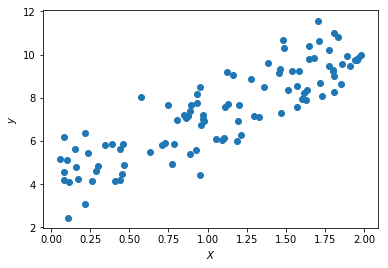

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.xlabel('$X$')
plt.ylabel('$y$')

In [6]:
X.shape

(100, 1)

In [8]:
# Füge x0 = 1 zu jedem Datenpunkt hinzu
X_b = np.c_[np.ones((100,1)), X]
X_b.shape

(100, 2)

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.09866443],
       [3.01355153]])

In [13]:
X_new = np.array([[0], [2]])
# Füge x0 = 1 zu jedem Datenpunkt hinzu
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [14]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.09866443],
       [10.12576749]])

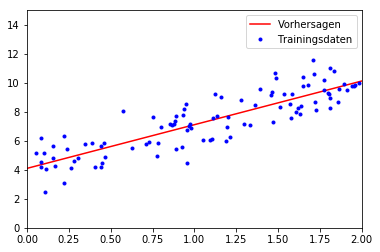

In [23]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.legend(["Vorhersagen", "Trainingsdaten"])
plt.show()

## Mit Sklearn

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(F'Achsenabweichung: {lin_reg.intercept_}\nGewichte: {lin_reg.coef_}')

Achsenabweichung: [4.09866443]
Gewichte: [[3.01355153]]


In [26]:
lin_reg.predict(X_new)

array([[ 4.09866443],
       [10.12576749]])

### Nachteil der Normalengleichung
Die Normalengleichung wird bei sehr vielen Merkmalen sehr langsam.

### Vorteil der Normalengleichung
Sie kann grosse Datensätze sehr effizient behandeln.  
Vorhersagen bei doppelt so vielen Datensätzen dauern nur etwa doppel so lange.

## Gradientenverfahren

Das Gradientenverfahren verändert die Parameter iterativ um so die Kostenfunktion zu minimieren.

1. $\theta$ wird mit Zufallszahlen befüllt (zufällige Initialisierung)
2. Die Parameter werden schrittweise verbessert um die Kostenfunktion zu senken
3. Der Algorithmus konvergiert bei einem Minimum

Die Lernrate (ein Hyperparameter) bestimmt die Grösse der Schritte:
* Bei einer zu kleinen Lernrate kann es sehr lange dauern, bis ein Minimum gefunden wird.
* Bei einer zu grossen Lernrate kann es passieren, dass nie das Minimum gefunden wird, da dieses ständig übersprungen wird.

MSE ist als Kostenfunktin für lineare Regressionsmodelle eine **konvexe Funktion**. Dies bedeutet, dass wenn man zwei beliebige Punkte auf der Kurve auswählt, ihre lineare Verbindung niemals die Kurve schneidet.

<img src="images/training_linear_models/konvex.png" alt="konvex function" width="400"/>

Somit hat die Kostenfunktion die Form einer Schüssel mit einem Minimum. Damit man dieses Minimum möglichst schnell findet, ist es wichtig, dass **alle Merkmale ähnlich skaliert sind**.
Dies macht die Schüssel schön rund, also zu einer Halbkugel. Bei unskalierten Merkmalen kann man sich auch eine Ellipse-artige Schüssel vorstellen, bei einer solchen kann es länger dauern, bis man das Minimum erreicht.

### Batch-Gradientenverfahren

Das Batch-Gradientenverfahren funktioniert mit partieller Ableitung. Es rechnet aus, wie stark sich die Kostenfunktion ändert, wenn man den Parameter $\theta_{j}$ ändert.

$$\frac{\delta}{\delta \theta_{j}} * MSE(X, h_{\theta})=\frac{2}{m}\sum_{i=1}^m(\theta^{T}*x^{(i)}-y^{(i)})x_{j}^{(i)}$$

Diese Ableitung wird aber nicht einzeln sondern gleich als Vektor für alle Modellparameter berechnet.

$$\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^T*(X*\theta-y)$$

Mit dieser Formel kann man den Gradientenvektor ermitteln, der vom Minimum weg weist. Um sich dem Minimum zu nähern muss man also in die entgegengesetzte Richtung gehen. Dazu subtrahiert man $\nabla_{\theta}MSE(\theta)$ von $\theta$.
Die Lernrate $\eta$ bestimmt, wie gross die Schritte sein sollen.
$$\theta^{nächster Schritt}=\theta - \eta\nabla_{\theta}MSE(\theta)$$

> Das Batch-Gradientenverfahren ist bei grossen Datensätzen sehr langsam, dafür ist es geeignet bei vielen Merkmalen.

Mit Hilfe der Gittersuche kann eine geeignete Lernrate gefunden werden.  
Um die Anzahl Iterationen zu bestimmen kann man die Anzahl Iterationen auf einen sehr hohen Wert setzen und den Algorithmus anhalten, sobald der Gradientenvektor ganz klein wird. Der Gradientenvektor ist dann so klein, das er sich dem Minimum kaum noch nähern kann. Dies wird als Toleranz bezeichnet.

In [33]:
# Lernrate eta
eta = 0.1
n_iter = 1000
m = 100

In [34]:
# Zufällige Initialisierung
theta = np.random.randn(2,1)

for iteration in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta * gradients

In [35]:
theta

array([[4.09866443],
       [3.01355153]])

### Stochastisches Gradientenverfahren

Das SGD (Stochastic Gradient Descent) wählt für jeden Schritt nur einen Datenpunkt zufällig aus. Dies macht ihn viel schneller als das Batch-Gradientenverfahren, aber durch seine Zufälligkeit hüpftf die Kostenfunktion ständig auf und ab und findet nie das perfekte Minimum.
> SGD lässt sich auch als Out-of-Core-Algorithmus implementieren

SGD kann durch die Zufälligkeit gut lokalen Minima entfliehen, kommt aber beim Minimum nie zur Ruhe.  
**Simulated Annealing:**  
Man wählt die Schritte zu Beginn gross um den lokalen Minima zu entfliehen und dann immer kleiner, damit der Algorithmus beim globalen Minima stehen bleibt.
Durch dieses "langsame Abkühlen" wird ein bestmögliches Resultat erzielt.

**Learning Schedule:**  
Dies ist die Funktion zum festlegen der Lernrate.

In [88]:
n_epochs = 50
# Hyperparameter für den Learning Schedule
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

In [89]:
# Zufällige Initialisierung
theta = np.random.randn(2,1)

In [90]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [91]:
theta

array([[4.11822041],
       [3.03029418]])

### Mit Sklearn

In [93]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(F'Achsenabweichung: {sgd_reg.intercept_}\nGewichte: {sgd_reg.coef_}')

Achsenabweichung: [4.07981117]
Gewichte: [3.00847528]
